In [100]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data

### #1 In a jupyter notebook, classification_exercises.ipynb, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

- print the first 3 rows
- print the number of rows and columns (shape)
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables. Would you recommend rescaling the data based on these statistics?

In [2]:
df_iris=data('iris')

In [77]:
#can also use seaborn to load
df_iris_seaborn=sns.load_dataset('iris')

In [3]:
#print the first 3 rows
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


In [4]:
#print the number of rows and columns (shape)
df_iris.shape

(150, 5)

In [5]:
#print the column names
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [78]:
#turn it into a list
df_iris.columns.to_list()

['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species']

In [6]:
#print the data type of each column
#can also use .dyptes
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [7]:
#print the summary statistics for each of the numeric variables. 
df_iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Would you recommend rescaling the data based on these statistics?
- not in this case. it is all in mm and range is not large

In [82]:
#can transcribe to make easier to read
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


_______

### #2 Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

- assign the first 100 rows to a new dataframe, df_excel_sample
- print the number of rows of your original dataframe
- print the first 5 column names
- print the column names that have a data type of object
- compute the range for each of the numeric variables.

In [8]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name='Table1_CustDetails')

In [9]:
df_excel.head()

,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,payment_type,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,1,1,1,Mailed check,65.6,593.30,No
1,0003-MKNFE,Male,0,No,No,2,1,0,Mailed check,59.9,542.40,No
2,0004-TLHLJ,Male,0,No,No,1,2,0,Electronic check,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,1,2,0,Electronic check,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,1,2,0,Mailed check,83.9,267.40,Yes


In [10]:
# assign the first 100 rows to a new dataframe, df_excel_sample
df_excel_sample = df_excel.head(100)

In [84]:
# print the number of rows of your original dataframe
df_excel.shape[0]

7049

In [12]:
# print the first 5 column names
df_excel.columns[:5]

Index(['customer_id', 'gender', 'is_senior_citizen', 'partner', 'dependents'], dtype='object')

In [13]:
# print the column names that have a data type of object
df_excel.dtypes

customer_id           object
gender                object
is_senior_citizen      int64
partner               object
dependents            object
phone_service          int64
internet_service       int64
contract_type          int64
payment_type          object
monthly_charges      float64
total_charges        float64
churn                 object
dtype: object

In [86]:
list(df_excel.select_dtypes(['object']).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [15]:
# compute the range for each of the numeric variables.
#step 1 create new variable with ONLY numeric values
excel_range = df_excel.select_dtypes(include=[np.number])
list(excel_range)

['is_senior_citizen',
 'phone_service',
 'internet_service',
 'contract_type',
 'monthly_charges',
 'total_charges']

In [90]:
#can also get range of specific columns
df_excel[['monthly_charges', 'total_charges']].describe()

,monthly_charges,total_charges
count,7049.000000,7038.000000
mean,64.747014,2283.043883
std,30.099460,2266.521984
min,18.250000,18.800000
25%,35.450000,401.587500
50%,70.350000,1397.100000
75%,89.850000,3793.775000
max,118.750000,8684.800000


In [16]:
#step 2 get max and min to get range
numeric_ranges = excel_range.max()- excel_range.min()
numeric_ranges

is_senior_citizen       1.0
phone_service           2.0
internet_service        2.0
contract_type           2.0
monthly_charges       100.5
total_charges        8666.0
dtype: float64

_______

### #3 Read the data from this google sheet into a dataframe, df_google

- print the first 3 rows
- print the number of rows and columns
- print the column names
- print the data type of each column
- print the summary statistics for each of the numeric variables
- print the unique values for each of your categorical variables

In [32]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
df_google = pd.read_csv(csv_export_url)

In [34]:
#print the first 3 rows
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [46]:
#print the number of rows and columns
df_google.shape

(891, 12)

In [47]:
#print the column names
df_google.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [91]:
#put it into a list- easier to read
df_google.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [50]:
#print the data type of each column
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [92]:
# print the summary statistics for each of the numeric variables
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [54]:
# print the unique values for each of your categorical variables
list(df_excel.select_dtypes(['object']).columns)

['customer_id', 'gender', 'partner', 'dependents', 'payment_type', 'churn']

In [55]:
df_google.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [68]:
df_google.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [94]:
#df_google['Name'].unique()

In [95]:
#This will give you the breakdown of each column
#dropna = False- will show if you have nulls
df_google.Pclass.value_counts(dropna=False)

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [96]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [97]:
df_google.Cabin.value_counts(dropna=False)

NaN                687
B96 B98              4
C23 C25 C27          4
G6                   4
C22 C26              3
E101                 3
D                    3
F2                   3
F33                  3
C124                 2
E33                  2
E8                   2
B49                  2
F4                   2
C92                  2
E24                  2
F G73                2
C125                 2
B22                  2
B58 B60              2
E121                 2
E67                  2
D26                  2
C83                  2
C52                  2
C68                  2
C93                  2
C78                  2
D36                  2
C2                   2
C123                 2
B18                  2
B51 B53 B55          2
B57 B59 B63 B66      2
E44                  2
D20                  2
C65                  2
D33                  2
E25                  2
B77                  2
C126                 2
B20                  2
D17                  2
D35        

In [98]:
df_google.Ticket.value_counts(dropna=False)

1601          7
CA. 2343      7
347082        7
CA 2144       6
3101295       6
             ..
5727          1
349248        1
386525        1
C.A. 24580    1
2683          1
Name: Ticket, Length: 681, dtype: int64

In [99]:
df_google.Sex.value_counts(dropna=False)

male      577
female    314
Name: Sex, dtype: int64

_______

# Exercises- Prepare.py (May 14)

The end product of this exercise should be the specified functions in a python script named prepare.py. Do these in your classification_exercises.ipynb first, then transfer to the prepare.py file.

This work should all be saved in your local classification-exercises repo. Then add, commit, and push your changes.

Using the Iris Data:

a. Use the function defined in acquire.py to load the iris data.

b. Drop the species_id and measurement_id columns.

c. Rename the species_name column to just species.

d. Create dummy variables of the species name.

e. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

### a. Use the function defined in acquire.py to load the iris data

In [105]:
from acquire import get_iris_data

In [107]:
get_iris_data()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [109]:
get_iris_data().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
 6   species_id      150 non-null    int64  
 7   species_name    150 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


### b. Drop the species_id and measurement_id columns.

In [110]:
columns_to_drop = ['species_id', 'measurement_id']

In [112]:
cleaning_iris_data = get_iris_data().drop(columns=columns_to_drop)

In [114]:
cleaning_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species_name
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### c. Rename the species_name column to just species.

In [115]:
cleaning_iris_data = cleaning_iris_data.rename(columns = {'species_name': 'species'})

In [117]:
cleaning_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### d. Create dummy variables of the species name.

In [119]:
dummy_name = pd.get_dummies(cleaning_iris_data[['species']], dummy_na = False, drop_first=[True])

In [122]:
#changes names to numeric dtype
dummy_name.head()

,species_versicolor,species_virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [126]:
cleaning_iris_data = pd.concat([cleaning_iris_data, dummy_name], axis=1)

In [127]:
cleaning_iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_versicolor,species_virginica
0,5.1,3.5,1.4,0.2,setosa,0,0
1,4.9,3.0,1.4,0.2,setosa,0,0
2,4.7,3.2,1.3,0.2,setosa,0,0
3,4.6,3.1,1.5,0.2,setosa,0,0
4,5.0,3.6,1.4,0.2,setosa,0,0


### e. Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [143]:
def prep_iris(df):
    '''
    accepts the untrasformed iris data
    returns: the data with cleaning operations performed on it 
    '''
    df = df.drop(columns= (['species_id', 'measurement_id']))
    df = df.rename(columns = {'species_name': 'species'})
    dummy_name = pd.get_dummies(df[['species']], dummy_na = False, drop_first=[True])
    df = pd.concat([df, dummy_name], axis=1)
    return df

_____________________________

# Exercises (May 18)

## Exploratory Analysis

Section 1 - iris_db: Using iris data from our mySQL server and the methods used in the lesson above:

1. **Acquire, prepare & split your data.**

2. **Univariate Stats**

    - **a**. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

    - **b**. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

    - **c**. Document takeaways & any actions.

3. **Bivariate Stats**

    - **a**. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).
    
    - **b**. For each measurement type, compute the descriptive statistics for each species.

    - **c**. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

    - **d**. Document takeaways & any actions.

4. **Multivariate Stats**

    - **a**. Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

    - **b**. Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

    - **c**. Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

    - **d**. Document takeaways and any actions.

### #1. Acquire, prepare & split your data.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pydataset import data
from acquire import get_connection, get_iris_data
from sklearn.model_selection import train_test_split

In [30]:
#this data has both tables in it (measure and species with a join)
iris = get_iris_data()
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [31]:
#show all column names
iris.columns

Index(['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_id', 'species_id', 'species_name'],
      dtype='object')

In [32]:
#rename columns
iris.columns = ['measurement_id', 'sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'species_id_drop', 'species_id', 'species_name']

In [34]:
#shows newly named column 'species_id_drop'
iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id_drop,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,1,setosa
1,2,4.9,3.0,1.4,0.2,1,1,setosa
2,3,4.7,3.2,1.3,0.2,1,1,setosa
3,4,4.6,3.1,1.5,0.2,1,1,setosa
4,5,5.0,3.6,1.4,0.2,1,1,setosa


In [36]:
#clean data- remove species_id_drop (same as species_id)
clean_iris=iris.drop(columns=['species_id_drop'])
clean_iris.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
0,1,5.1,3.5,1.4,0.2,1,setosa
1,2,4.9,3.0,1.4,0.2,1,setosa
2,3,4.7,3.2,1.3,0.2,1,setosa
3,4,4.6,3.1,1.5,0.2,1,setosa
4,5,5.0,3.6,1.4,0.2,1,setosa


In [46]:
#see if you have any nulls
clean_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  150 non-null    int64  
 1   sepal_length    150 non-null    float64
 2   sepal_width     150 non-null    float64
 3   petal_length    150 non-null    float64
 4   petal_width     150 non-null    float64
 5   species_id      150 non-null    int64  
 6   species_name    150 non-null    object 
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [51]:
iris=clean_iris

In [52]:
#split data using sklearn import

train_and_validate, test = train_test_split(
    iris,
    test_size=.15,
    random_state=123,
)
train, validate = train_test_split(
    train_and_validate,
    test_size=.15,
    random_state=123,
)

In [40]:
#this is the size of the entire data set
iris.shape

(150, 8)

In [42]:
#this is the size of the train data set
train.shape, train.info()
#107 data points in test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107 entries, 67 to 109
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  107 non-null    int64  
 1   sepal_length    107 non-null    float64
 2   sepal_width     107 non-null    float64
 3   petal_length    107 non-null    float64
 4   petal_width     107 non-null    float64
 5   species_id      107 non-null    int64  
 6   species_id      107 non-null    int64  
 7   species_name    107 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 7.5+ KB


((107, 8), None)

In [54]:
train.head()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id,species_name
67,68,5.8,2.7,4.1,1.0,2,versicolor
105,106,7.6,3.0,6.6,2.1,3,virginica
91,92,6.1,3.0,4.6,1.4,2,versicolor
50,51,7.0,3.2,4.7,1.4,2,versicolor
98,99,5.1,2.5,3.0,1.1,2,versicolor


In [43]:
#this is the size of the validate data set
validate.shape, validate.info()
#20 data points in test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 121 to 6
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  20 non-null     int64  
 1   sepal_length    20 non-null     float64
 2   sepal_width     20 non-null     float64
 3   petal_length    20 non-null     float64
 4   petal_width     20 non-null     float64
 5   species_id      20 non-null     int64  
 6   species_id      20 non-null     int64  
 7   species_name    20 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 1.4+ KB


((20, 8), None)

In [44]:
#this is the size of the test data set
test.shape, test.info()
#23 data points in test set

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 72 to 24
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   measurement_id  23 non-null     int64  
 1   sepal_length    23 non-null     float64
 2   sepal_width     23 non-null     float64
 3   petal_length    23 non-null     float64
 4   petal_width     23 non-null     float64
 5   species_id      23 non-null     int64  
 6   species_id      23 non-null     int64  
 7   species_name    23 non-null     object 
dtypes: float64(4), int64(3), object(1)
memory usage: 1.6+ KB


((23, 8), None)

In [60]:
#melt
melt = train.melt(id_vars='species_name')
melt

,species_name,variable,value
0,versicolor,measurement_id,68.0
1,virginica,measurement_id,106.0
2,versicolor,measurement_id,92.0
3,versicolor,measurement_id,51.0
4,versicolor,measurement_id,99.0
...,...,...,...
637,virginica,species_id,3.0
638,versicolor,species_id,2.0
639,versicolor,species_id,2.0
640,versicolor,species_id,2.0


### #2. Univariate Stats

### 2a. For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 65.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 81.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 50.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 68.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='variable', ylabel='value'>

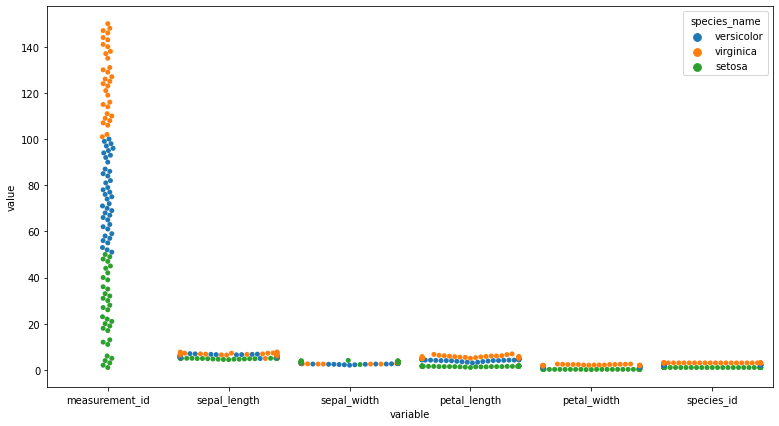

In [66]:
plt.figure(figsize=(13,7))
sns.swarmplot(x='variable', y='value', hue= 'species_name', data=melt)

array([[<AxesSubplot:title={'center':'measurement_id'}>,
        <AxesSubplot:title={'center':'sepal_length'}>],
       [<AxesSubplot:title={'center':'sepal_width'}>,
        <AxesSubplot:title={'center':'petal_length'}>],
       [<AxesSubplot:title={'center':'petal_width'}>,
        <AxesSubplot:title={'center':'species_id'}>]], dtype=object)

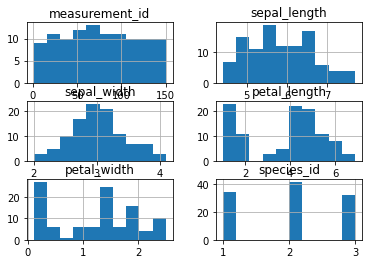

In [70]:
train.hist()

<AxesSubplot:>

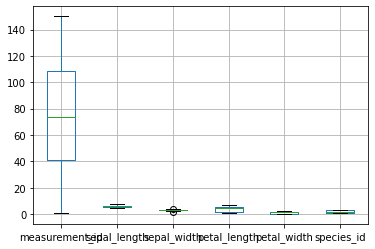

In [73]:
train.boxplot()

In [67]:
train.describe()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,74.719626,5.845794,3.038318,3.774766,1.199065,1.981308
std,42.087912,0.804384,0.417234,1.717012,0.738496,0.788853
min,1.000000,4.400000,2.000000,1.000000,0.100000,1.000000
25%,41.000000,5.100000,2.800000,1.600000,0.350000,1.000000
50%,74.000000,5.800000,3.000000,4.300000,1.300000,2.000000
75%,108.500000,6.400000,3.300000,5.100000,1.800000,3.000000
max,150.000000,7.700000,4.100000,6.900000,2.500000,3.000000


### 2b. For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [82]:
#frequency table
train.value_counts().head()

measurement_id  sepal_length  sepal_width  petal_length  petal_width  species_id  species_name
150             5.9           3.0          5.1           1.8          3           virginica       1
40              5.1           3.4          1.5           0.2          1           setosa          1
44              5.0           3.5          1.6           0.6          1           setosa          1
45              5.1           3.8          1.9           0.4          1           setosa          1
47              5.1           3.8          1.6           0.2          1           setosa          1
dtype: int64

### 2c. Document takeaways & any actions.

In [79]:
train.corr()

,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_id
measurement_id,1.000000,0.681147,-0.441359,0.867483,0.883328,0.935816
sepal_length,0.681147,1.000000,-0.161847,0.873929,0.806201,0.767032
sepal_width,-0.441359,-0.161847,1.000000,-0.447030,-0.378925,-0.456408
petal_length,0.867483,0.873929,-0.447030,1.000000,0.958996,0.943414
petal_width,0.883328,0.806201,-0.378925,0.958996,1.000000,0.952168
species_id,0.935816,0.767032,-0.456408,0.943414,0.952168,1.000000


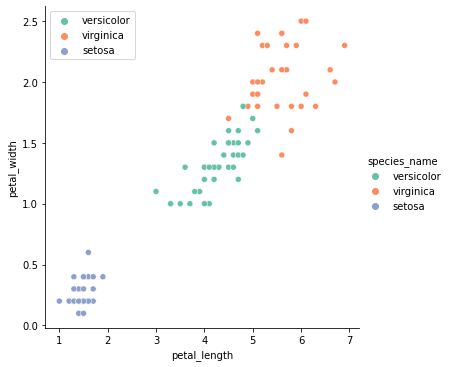

In [81]:
#the table above shows that there is greatest correlation between petal length and petal width
sns.relplot(x='petal_length', y='petal_width', data=train, hue='species_name', palette='Set2')
plt.legend()
plt.show()

### #3 Bivariate Stats

### 3a. Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

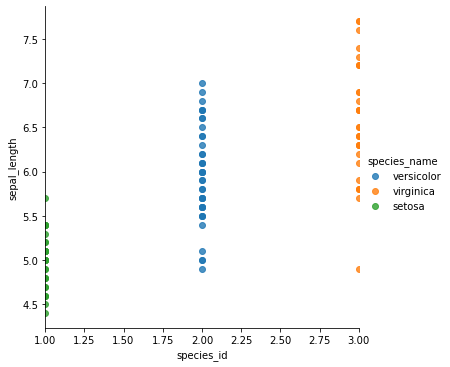

In [84]:
sns.lmplot(x= 'species_id', hue='species_name', y='sepal_length', data=train)

### 3b. For each measurement type, compute the descriptive statistics for each species.

NameError: name 'sepal_length' is not defined

### 3c. For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

### 3d. Document takeaways & any actions.